# AnalyticsVidhya Workshop

In [2]:
import pandas as pd

In [76]:
# let's load the training and test data
train = pd.read_csv('data/train.csv')
test = pd.read_csv('data/test.csv')

## Univariate Analysis

In [77]:
train.dtypes

ID                 int64
Age                int64
Workclass         object
Education         object
Marital.Status    object
Occupation        object
Relationship      object
Race              object
Sex               object
Hours.Per.Week     int64
Native.Country    object
Income.Group      object
dtype: object

In [5]:
# continuous variables
train.describe()

,ID,Age,Hours.Per.Week
count,32561.000000,32561.000000,32561.000000
mean,16281.000000,38.581647,40.437456
std,9399.695394,13.640433,12.347429
min,1.000000,17.000000,1.000000
25%,8141.000000,28.000000,40.000000
50%,16281.000000,37.000000,40.000000
75%,24421.000000,48.000000,45.000000
max,32561.000000,90.000000,99.000000


In [6]:
# step 1: get a list of categorical variables
categorical_variables = train.dtypes.loc[train.dtypes=='object'].index
print(categorical_variables)

Index(['Workclass', 'Education', 'Marital.Status', 'Occupation',
       'Relationship', 'Race', 'Sex', 'Native.Country', 'Income.Group'],
      dtype='object')


In [7]:
# step 2: use the apply function in python to
# determine the number of unique values in each column
train[categorical_variables].apply(lambda x: len(x.unique()))

Workclass          9
Education         16
Marital.Status     7
Occupation        15
Relationship       6
Race               5
Sex                2
Native.Country    42
Income.Group       2
dtype: int64

In [8]:
# Analyzing Race
# print the counts of each category
train['Race'].value_counts()

White                 27816
Black                  3124
Asian-Pac-Islander     1039
Amer-Indian-Eskimo      311
Other                   271
Name: Race, dtype: int64

In [9]:
# print the percentage of observations in each category
train['Race'].value_counts()/train.shape[0]

White                 0.854274
Black                 0.095943
Asian-Pac-Islander    0.031909
Amer-Indian-Eskimo    0.009551
Other                 0.008323
Name: Race, dtype: float64

In [10]:
# Analyzing Native-Country
# print the counts of each category
train['Native.Country'].value_counts()

United-States                 29170
Mexico                          643
Philippines                     198
Germany                         137
Canada                          121
Puerto-Rico                     114
El-Salvador                     106
India                           100
Cuba                             95
England                          90
Jamaica                          81
South                            80
China                            75
Italy                            73
Dominican-Republic               70
Vietnam                          67
Guatemala                        64
Japan                            62
Poland                           60
Columbia                         59
Taiwan                           51
Haiti                            44
Iran                             43
Portugal                         37
Nicaragua                        34
Peru                             31
Greece                           29
France                      

In [11]:
# print the percentage of observations in each category
train['Native.Country'].value_counts()/train.shape[0]

United-States                 0.895857
Mexico                        0.019748
Philippines                   0.006081
Germany                       0.004207
Canada                        0.003716
Puerto-Rico                   0.003501
El-Salvador                   0.003255
India                         0.003071
Cuba                          0.002918
England                       0.002764
Jamaica                       0.002488
South                         0.002457
China                         0.002303
Italy                         0.002242
Dominican-Republic            0.002150
Vietnam                       0.002058
Guatemala                     0.001966
Japan                         0.001904
Poland                        0.001843
Columbia                      0.001812
Taiwan                        0.001566
Haiti                         0.001351
Iran                          0.001321
Portugal                      0.001136
Nicaragua                     0.001044
Peru                     

In [12]:
q1 = train['Age'].quantile(0.25)
q3 = train['Age'].quantile(0.75)
iqr = q3 - q1

In [13]:
iqr

20.0

## Multivariate Analysis

The type of visualization technique to use depends on the type of each variable. Thus there can be 3 combinations of the type of the 2 variables:

1. categorical - categorical
2. continuous - continuous
3. categorical - continuous

### categorical - categorical

In [14]:
# print the cross tabulation
ct = pd.crosstab(train['Sex'], train['Income.Group'], margins=True)
ct

Income.Group,<=50K,>50K,All
Sex,,,
Female,9592,1179,10771
Male,15128,6662,21790
All,24720,7841,32561


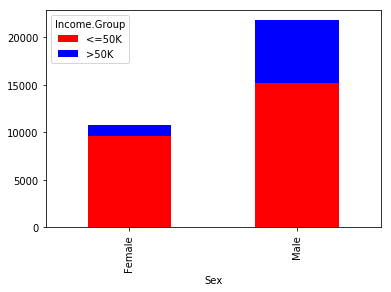

In [15]:
# plot using a stacked chart
%matplotlib inline
ct.iloc[:-1,:-1].plot(kind='bar', stacked=True, color=['red', 'blue'], grid=False)

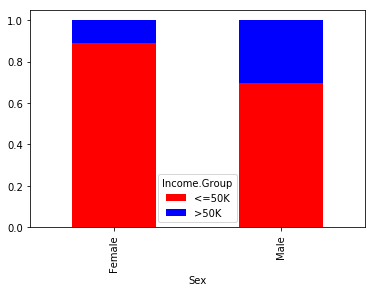

In [16]:
def perc_convert(ser):
    return ser/float(ser[-1])
ct2 = ct.apply(perc_convert, axis=1)
ct2.iloc[:-1,:-1].plot(kind='bar', stacked=True, color=['red', 'blue'], grid=False)

### continuous - continuous

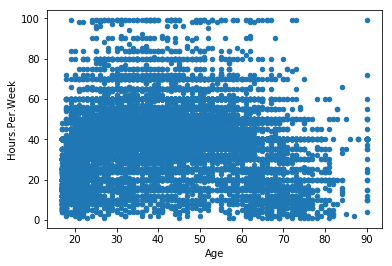

In [17]:
train.plot('Age', 'Hours.Per.Week', kind='scatter')

### categorical - continuous

/Users/invictus/anaconda/envs/av36/lib/python3.6/site-packages/numpy/core/fromnumeric.py:57: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  return getattr(obj, method)(*args, **kwds)


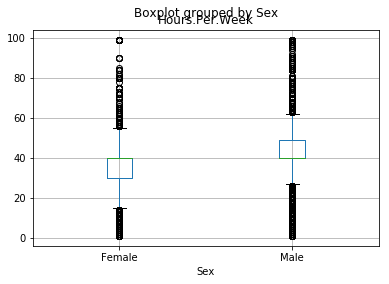

In [18]:
train.boxplot(column='Hours.Per.Week', by='Sex')

In [19]:
ct2

Income.Group,<=50K,>50K,All
Sex,,,
Female,0.890539,0.109461,1.0
Male,0.694263,0.305737,1.0
All,0.759190,0.240810,1.0


## Missing Value Treatment

### Checking missing values

In [78]:
# checking the missing values in the training data
train.apply(lambda x: sum(x.isnull()))

ID                   0
Age                  0
Workclass         1836
Education            0
Marital.Status       0
Occupation        1843
Relationship         0
Race                 0
Sex                  0
Hours.Per.Week       0
Native.Country     583
Income.Group         0
dtype: int64

In [79]:
# checking the missing values in the test data
test.apply(lambda x: sum(x.isnull()))

ID                  0
Age                 0
Workclass         963
Education           0
Marital.Status      0
Occupation        966
Relationship        0
Race                0
Sex                 0
Hours.Per.Week      0
Native.Country    274
dtype: int64

### Imputation

In [22]:
from scipy.stats import mode

In [80]:
mode(train['Workclass'].astype('str')).mode[0]

/Users/invictus/anaconda/envs/av36/lib/python3.6/site-packages/scipy/stats/stats.py:245: RuntimeWarning: The input array could not be properly checked for nan values. nan values will be ignored.
  "values. nan values will be ignored.", RuntimeWarning)


'Private'

In [81]:
var_to_impute = ['Workclass', 'Occupation', 'Native.Country']
for var in var_to_impute:
    train[var].fillna(mode(train[var].astype('str')).mode[0], inplace=True)
    test[var].fillna(mode(test[var].astype('str')).mode[0], inplace=True)

/Users/invictus/anaconda/envs/av36/lib/python3.6/site-packages/scipy/stats/stats.py:245: RuntimeWarning: The input array could not be properly checked for nan values. nan values will be ignored.
  "values. nan values will be ignored.", RuntimeWarning)


In [82]:
mode(train['Workclass']).mode[0]

/Users/invictus/anaconda/envs/av36/lib/python3.6/site-packages/scipy/stats/stats.py:245: RuntimeWarning: The input array could not be properly checked for nan values. nan values will be ignored.
  "values. nan values will be ignored.", RuntimeWarning)


'Private'

In [83]:
# check again for 'missing values' again to confirm
train.apply(lambda x: sum(x.isnull()))

ID                0
Age               0
Workclass         0
Education         0
Marital.Status    0
Occupation        0
Relationship      0
Race              0
Sex               0
Hours.Per.Week    0
Native.Country    0
Income.Group      0
dtype: int64

In [84]:
test.apply(lambda x: sum(x.isnull()))

ID                0
Age               0
Workclass         0
Education         0
Marital.Status    0
Occupation        0
Relationship      0
Race              0
Sex               0
Hours.Per.Week    0
Native.Country    0
dtype: int64

## Outlier treatment

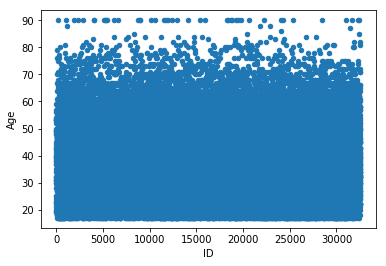

In [86]:
train.plot('ID', 'Age', kind='scatter')

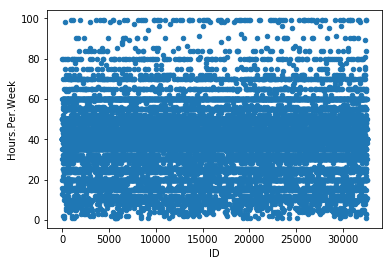

In [87]:
train.plot('ID', 'Hours.Per.Week', kind='scatter')

## Variable transformation

In [91]:
train['Workclass'].value_counts()/train.shape[0]

Private             0.753417
Self-emp-not-inc    0.078038
Local-gov           0.064279
State-gov           0.039864
Self-emp-inc        0.034274
Federal-gov         0.029483
Without-pay         0.000430
Never-worked        0.000215
Name: Workclass, dtype: float64

In [92]:
categories_to_combine = ['State-gov','Self-emp-inc','Federal-gov','Without-pay','Never-worked']

In [96]:
for cat in categories_to_combine:
    train['Workclass'].replace({cat:'Others'},inplace=True)
    test['Workclass'].replace({cat:'Others'},inplace=True)

In [97]:
train['Workclass'].value_counts()/train.shape[0]

Private             0.753417
Others              0.104266
Self-emp-not-inc    0.078038
Local-gov           0.064279
Name: Workclass, dtype: float64

In [98]:
test['Workclass'].value_counts()/train.shape[0]

Private             0.373852
Others              0.053561
Self-emp-not-inc    0.040570
Local-gov           0.032032
Name: Workclass, dtype: float64

In [109]:
# lets combine the rest of the categorical vairables
# removing 'workclass' because already combined
categorical_variables = categorical_variables[1:]

In [111]:
# current no. of unique values
train[categorical_variables].apply(lambda x: len(x.unique()))

Education         16
Marital.Status     7
Occupation        14
Relationship       6
Race               5
Sex                2
Native.Country    41
Income.Group       2
dtype: int64

In [112]:
for column in categorical_variables:
    # determine the categories to combine
    frq = train[column].value_counts()/train.shape[0]
    categories_to_combine = frq.loc[frq.values<0.05].index
    
    for cat in categories_to_combine:
        train[column].replace({cat:'Others'},inplace=True)
        test[column].replace({cat:'Others'},inplace=True)

In [113]:
train[categorical_variables].apply(lambda x: len(x.unique()))

Education         5
Marital.Status    4
Occupation        8
Relationship      5
Race              3
Sex               2
Native.Country    2
Income.Group      2
dtype: int64

In [119]:
test[categorical_variables[:-1]].apply(lambda x: len(x.unique()))

Education         5
Marital.Status    4
Occupation        8
Relationship      5
Race              3
Sex               2
Native.Country    2
dtype: int64

In [156]:
# bins = list(range(0, 101, 5))
# pd.value_counts(pd.cut(train['Hours.Per.Week'], bins))

## Predictive Modeling

### Data Preprocessing

In [133]:
from sklearn.preprocessing import LabelEncoder

In [135]:
categorical_variables = train.dtypes.loc[train.dtypes=='object'].index
categorical_variables

Index(['Workclass', 'Education', 'Marital.Status', 'Occupation',
       'Relationship', 'Race', 'Sex', 'Native.Country', 'Income.Group'],
      dtype='object')

In [194]:
le = LabelEncoder()

for var in categorical_variables:
    train[var] = le.fit_transform(train[var])
    if var in test.columns:
        test[var] = le.fit_transform(test[var])

In [195]:
train.dtypes

ID                int64
Age               int64
Workclass         int64
Education         int64
Marital.Status    int64
Occupation        int64
Relationship      int64
Race              int64
Sex               int64
Hours.Per.Week    int64
Native.Country    int64
Income.Group      int64
dtype: object

### Fit the model

In [196]:
from sklearn.tree import DecisionTreeClassifier

In [197]:
# define the predictors which will be all
# variables except ID and target
dependent_variable = 'Income.Group'
independent_variables = [x for x in train.columns if x not in ['ID', dependent_variable]]
independent_variables

['Age',
 'Workclass',
 'Education',
 'Marital.Status',
 'Occupation',
 'Relationship',
 'Race',
 'Sex',
 'Hours.Per.Week',
 'Native.Country']

In [356]:
# initialize the algorithm
model = DecisionTreeClassifier(max_depth=10, min_samples_leaf=50, max_features='sqrt')
#model = DecisionTreeClassifier(max_depth=50,min_samples_leaf=2)

# fit the algorithm
model.fit(train[independent_variables], train[dependent_variable])

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=10,
            max_features='sqrt', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=50, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

### Make predictions

In [357]:
predictions_train = model.predict(train[independent_variables])
predictions_test = model.predict(test[independent_variables])

### Analyze results

In [358]:
from sklearn.metrics import accuracy_score

In [359]:
# determine the train error
acc_train = accuracy_score(train[dependent_variable], predictions_train)

In [360]:
"Train accuracy: %f" % acc_train

'Train accuracy: 0.820491'

In [361]:
df = pd.DataFrame(predictions_test, columns=['Income.Group'], index=test['ID'])

In [362]:
df.loc[df['Income.Group'] == 0, 'Income.Group'] = "<=50K"
df.loc[df['Income.Group'] == 1, 'Income.Group'] = ">50K"

In [363]:
df.to_csv('data/sample_submission.csv', index_label='ID', header=['Income.Group'])